# BDAT 1004 Problem Set 2 - 200496961 - Rama Krishna Adireddy

# Problem 1

In [12]:
a = 0
def b():
    global a
    #print(a)
    a = c(a)
    print(a)

def c(a):
    return a+2

In [ ]:
#Here a is a global variable, Global variable can be used in any number of functions

In [13]:
b() 

2


In [ ]:
# in this global is defined and its calling c function where global value a is getting incremented by 2.
# as the global value of a = 0, then it will be 2

In [14]:
b()

4


In [ ]:
# as the global value of a = 2, then it will be incremented by 2, so a = 4

In [15]:
b()

6


In [ ]:
# as the global value of a = 4, then it will be incremented by 2, so a = 6

In [16]:
a

6

In [ ]:
# as a values is already 6, it prints the a value

# Problem 2

In [22]:
file_length("C:\\Users\\ramki\\Desktop\\midterm.py")

#midterm.py file
#def file_length(file_name):
#    try:
#        file = open(file_name)
#        contents = file.read()
#        file.close()
#        print(len(contents))
#    except OSError:
#        print("File is not found")

254


In [23]:
file_length("C:\\Users\\ramki\\Desktop\\midtem.py")

File is not found


# Problem 3

In [24]:
class Marsupial:
    
    def __init__(self):
        self.lt = []
    
    def put_in_pouch(self, item):
        return self.lt.append(item)
    
    def pouch_contents(self):
        print(self.lt)
        
    
    
class Kangaroo(Marsupial):
    
    def __init__(self, xcoord = 0, ycoord = 0):
        self.x = xcoord
        self.y = ycoord
    def setx(self, xcoord):
        self.x = xcoord
    def sety(self, ycoord):
        self.y = ycoord
    def get(self):
        return (self.x, self.y)
    def move(self, dx, dy):
        self.x += dx
        self.y += dy
    def __str__(self):
        return 'I am Kangaroo located at ({}, {})'.format(self.x, self.y)
        

In [25]:
m = Marsupial()
m.put_in_pouch('apple')
m.put_in_pouch('banana')
m.put_in_pouch('truck')
m.pouch_contents()

['apple', 'banana', 'truck']


In [26]:
k = Kangaroo(0,0)
print(k)

I am Kangaroo located at (0, 0)


In [27]:
k.move(1,0)
k.move(2,0)
k.move(3,0)
k.get()
print(k)

I am Kangaroo located at (6, 0)


# Problem 4

In [29]:
def collatz(x):
    print(x)
    if x == 1:
        return x
    elif((x%2) == 0):   
        x = x//2
        collatz(x)
    else:
        x = (3*x)+1
        collatz(x)

In [30]:
collatz(10)

10
5
16
8
4
2
1


In [31]:
collatz(1)

1


1

# Problem 5

In [35]:
def binary(n):
    if(n > 1):
        binary(n//2)
    print(n%2,end = '')

In [36]:
binary(10)

1010

In [37]:
binary(9)

1001

In [38]:
binary(5)

101

# Problem 6

In [39]:
from html.parser import HTMLParser
from bs4 import BeautifulSoup
inf = open("C:\\Users\\ramki\\Desktop\\ps2.html","r")
content = inf.read()
inf.close()
htmlp = HTMLParser()
htmlp.feed(content)
Par = BeautifulSoup(content)
heading_tags = ["h1", "h2"]
for tags in Par.find_all(heading_tags):
    print(tags.text.strip(),end='\n ')

W3C Mission
 Principles
 

# Problem 7

In [9]:
from urllib.request import urlopen
from urllib.parse import urljoin
from html.parser import HTMLParser
class Collector(HTMLParser):

    def __init__(self, url):
        HTMLParser.__init__(self)
        self.url = url
        self.links = []
    def handle_starttag(self, t, attrs):
        if t == 'a':
            for attr in attrs:
                if attr[0] == 'href':
                    absolute = urljoin(self.url, attr[1])
                    if absolute[:4] == 'http':
                        self.links.append(absolute)                    
    def getLinks(self):
        return self.links

In [10]:
def web(link,dp,ind):
        for indentation in range(ind+1):
            print('\t',end='')
        print(link)
        content = urlopen(link).read().decode()
        collector = Collector(link)
        collector.feed(content)
        links = collector.getLinks()
        for i in range(dp):
            try:
                web(links[i],dp-1,ind+1)
            except:
                pass
web('http://reed.cs.depaul.edu/lperkovic/test1.html',2,0)

	http://reed.cs.depaul.edu/lperkovic/test1.html
		http://reed.cs.depaul.edu/lperkovic/test2.html
			http://reed.cs.depaul.edu/lperkovic/test4.html
		http://reed.cs.depaul.edu/lperkovic/test3.html
			http://reed.cs.depaul.edu/lperkovic/test4.html


# Problem 8

Table Creation and Data Insertion in SSMS Refernce from Stack Overflow

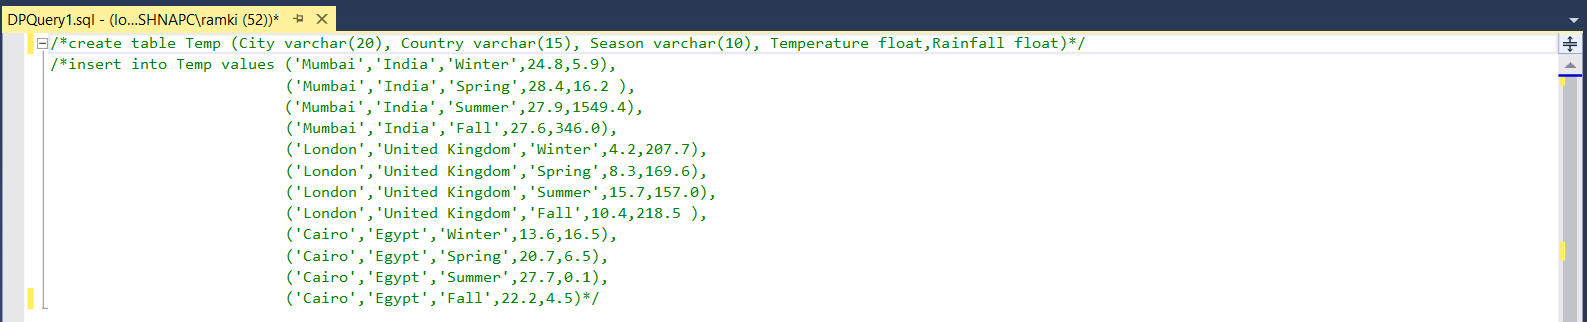

In [40]:
import pyodbc

server = "(localdb)\MSSQLLocalDB"
db = "Data Programming"
trusted_connection = "yes"

connection=pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server + ';trusted_connection='+trusted_connection + ';DATABASE=' + db )

cursor = connection.cursor()
cursor.execute("SELECT * FROM Temp")
rows = cursor.fetchall()

cursor = connection.cursor()
cursor.execute("SELECT * FROM Temp")
rows = cursor.fetchall()


8.1 #All the temperature data

In [41]:
print('Temprature data:')
for row in rows:
    print(row[3])
print( )

Temprature data:
24.8
28.4
27.9
27.6
4.2
8.3
15.7
10.4
13.6
20.7
27.7
22.2



8.2 #All the cities, but without repetition.

In [44]:
cursor = connection.cursor()
cursor.execute("Select Distinct City from Temp")
rows_cities = cursor.fetchall()

print('Cities:')
for city in rows_cities:
    print(city[0])

Cities:
Cairo
London
Mumbai


8.3 #All the records for India.

In [46]:
cursor = connection.cursor()
cursor.execute("Select City,Country,Season,Temperature,Rainfall from Temp where Country = 'India'")
rows_India = cursor.fetchall()
print(" All records for India")
for output in rows_India:
        print(output[0:])

 All records for India
('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)


8.4 #All the Fall records.

In [47]:
cursor = connection.cursor()
cursor.execute("Select City,Country,Season,Temperature,Rainfall from Temp where Season = 'Fall'")
fall_season = cursor.fetchall()
print("All the Fall records")
for fall_records in fall_season:
        print(fall_records[0:])

All the Fall records
('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


8.5 #The city, country, and season for which the average rainfall is between 200 and 400 millimeters

In [49]:
cursor = connection.cursor()
cursor.execute("Select City,Country,Season,Avg(Rainfall) from Temp group by City,Country,Season having (Avg(Rainfall))>= 200 and (Avg(Rainfall))<= 400 ")
records = cursor.fetchall()
print("city, country, and season -Avg. Rainfall in range of 200mm - 400mm ")
for record in records:
        print(record[0:])

city, country, and season -Avg. Rainfall in range of 200mm - 400mm 
('London', 'United Kingdom', 'Fall', 218.5)
('London', 'United Kingdom', 'Winter', 207.7)
('Mumbai', 'India', 'Fall', 346.0)


8.6 #The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

In [50]:
cursor = connection.cursor()
cursor.execute("Select City,Country,round(Avg(Temperature),1) from Temp group by City,Country having Avg(Temperature)>20 order by Avg(Temperature)")
temps = cursor.fetchall()
print("city, country - Avg. Temp is greater than 20 Degrees ")
for temp in temps:
        print(temp[0:])

city, country - Avg. Temp is greater than 20 Degrees 
('Cairo', 'Egypt', 21.1)
('Mumbai', 'India', 27.2)


8.7 #The total annual rainfall for Cairo.

In [51]:
cursor = connection.cursor()
cursor.execute("Select City,round(Sum(RainFall),2) from Temp where City = 'Cairo' group by City")
Total_Rainfall = cursor.fetchall()
print("city - Annual Rainfall for Cairo ")
for Rainfall in Total_Rainfall:
        print(Rainfall[0:])

city - Annual Rainfall for Cairo 
('Cairo', 27.6)


8.8 #The total rainfall for each season.

In [52]:
cursor = connection.cursor()
cursor.execute("Select Season,round(Sum(Temperature),2) from Temp group by Season")
Total_Temp = cursor.fetchall()
print("Season - Total temp ")
for Temprature in Total_Temp:
        print(Temprature[0:])

Season - Total temp 
('Fall', 60.2)
('Spring', 57.4)
('Summer', 71.3)
('Winter', 42.6)


# Problem 9

In [53]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

9A 

In [54]:
upper_word = [each_word.upper() for each_word in (words)] 
print(upper_word, end = "\n \n") 

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
 


9B

In [55]:
lower_word = [each_word.lower() for each_word in (words)] 
print(lower_word, end = "\n \n") 

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
 


9C

In [56]:
length = [len(words) for words in (words)] 
print(length, end = "\n \n")

[3, 5, 5, 3, 5, 4, 3, 4, 3]
 


9D

In [57]:
word_List = []
for i in range(len(words)):
    word_List.append([upper_word[i],lower_word[i],length[i]])
print(word_List, end = "\n \n")

[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]
 


9E

In [58]:
word = []
for i in range(len(words)):
    if len(words[i]) >= 4:
        word.append(words[i])
print(word)

['quick', 'brown', 'jumps', 'over', 'lazy']
